In [1]:
from model import *
from data import *
from custom_callbacks import ValidatePredictions
import cv2
import random
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import TensorBoard
import time

import tensorflow as tf


In [2]:
model = unet("weights/Unet_22_0.14018212258815765_0.8598212599754333.h5")


2022-06-27 22:12:58.406854: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-27 22:12:58.410535: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-27 22:12:58.410642: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-27 22:12:58.411116: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [14]:
import numpy as np
from PIL import Image
import math

def tile_image(p_img, folder, h: int = 512, w: int = 512) -> list:
    im = np.array(Image.open(p_img))
    print(im.shape)
    # https://stackoverflow.com/a/47581978/4521646
    tiles = [im[i:(i + h), j:(j + w), ...] for i in range(0, im.shape[0], h) for j in range(0, im.shape[1], w)]
    idxs = [(i, (i + h), j, (j + w)) for i in range(0, im.shape[0], h) for j in range(0, im.shape[1], w)]
    name, _ = os.path.splitext(os.path.basename(p_img))
    tile_img = []
    for k, tile in enumerate(tiles):
        if tile.shape[:2] != (h, w):
            tile_ = tile
            tile = np.zeros_like(tiles[0])
            tile[:tile_.shape[0], :tile_.shape[1], ...] = tile_

            tile_img.append(tile)
    return tile_img, idxs

tile_size = 256
image_size = (3000, 3000)
tiles_img, _ = tile_image("../hubmap-organ-segmentation/train_images/12233.tiff", "../hubmap-organ-segmentation/tiles/images", h=tile_size, w=tile_size)
tiles_seg, idxs = tile_image("../hubmap-organ-segmentation/train_masks/12233.tiff", "../hubmap-organ-segmentation/tiles/masks", h=tile_size, w=tile_size)



size = math.ceil(image_size[0]/tile_size)

(3000, 3000, 3)
(3000, 3000, 4)


In [13]:
print(len(tiles_img))
for i in tiles_img:
    print(i.shape)

23
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)


(256, 256)
1/1 [==============================] - 0s 12ms/step
(256, 256)
1/1 [==============================] - 0s 12ms/step
(256, 256)
1/1 [==============================] - 0s 12ms/step
(256, 256)
1/1 [==============================] - 0s 12ms/step
(256, 256)
1/1 [==============================] - 0s 12ms/step
(256, 256)
1/1 [==============================] - 0s 12ms/step
(256, 256)
1/1 [==============================] - 0s 12ms/step
(256, 256)
1/1 [==============================] - 0s 12ms/step
(256, 256)
1/1 [==============================] - 0s 12ms/step
(256, 256)
1/1 [==============================] - 0s 12ms/step
(256, 256)
1/1 [==============================] - 0s 12ms/step
(256, 256)
1/1 [==============================] - 0s 12ms/step
(256, 256)
1/1 [==============================] - 0s 12ms/step
(256, 256)
1/1 [==============================] - 0s 12ms/step
(256, 256)
1/1 [==============================] - 0s 12ms/step
(256, 256)
1/1 [==============================] - 0s 12

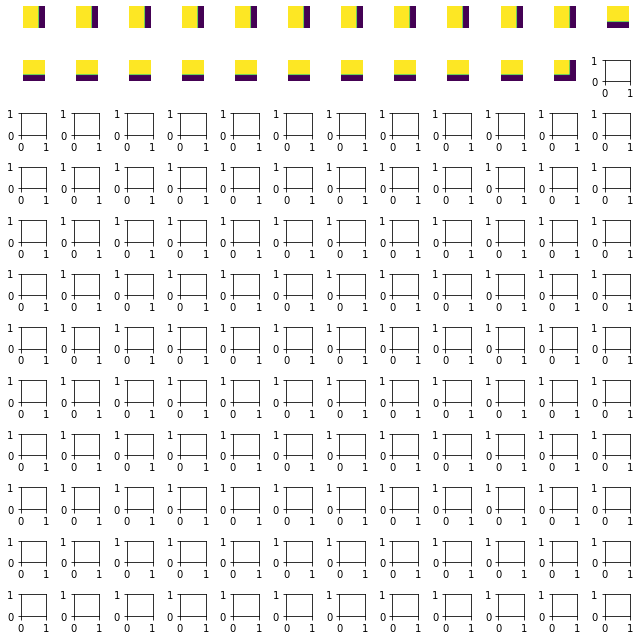

In [18]:


import matplotlib.pyplot as plt
from skimage import color

fig, axes = plt.subplots(nrows=size, ncols=size, figsize=(9, 9))
# fig2, axes2 = plt.subplots(nrows=size, ncols=size, figsize=(9, 9))

for i, (p_img, p_seg) in enumerate(zip(tiles_img, tiles_seg)):
    img = np.asarray(Image.fromarray((p_img)).convert("L"))
    mask = np.asarray(Image.fromarray((p_seg)).convert("L"))
    print(mask.shape)
    img, ground_truth=adjustData(img,mask, False, 2)
    pred = model.predict(np.expand_dims(img,axis=0))
    pred = np.squeeze(pred)
    axes[i // size, i % size].imshow(Image.blend(Image.fromarray(img).convert("L"), Image.fromarray(mask).convert("L"), 0.3))
#     axes2[i // size, i % size].imshow(Image.blend(Image.fromarray(np.uint8(img * 255), 'L'), Image.fromarray(np.uint8(mask * 255), 'L'), 0.3))

    axes[i // size, i % size].set_axis_off()
#     axes2[i // size, i % size].set_axis_off()


fig.tight_layout()
# fig2.tight_layout()
